In [1]:
%store -r df_pca
%store -r df

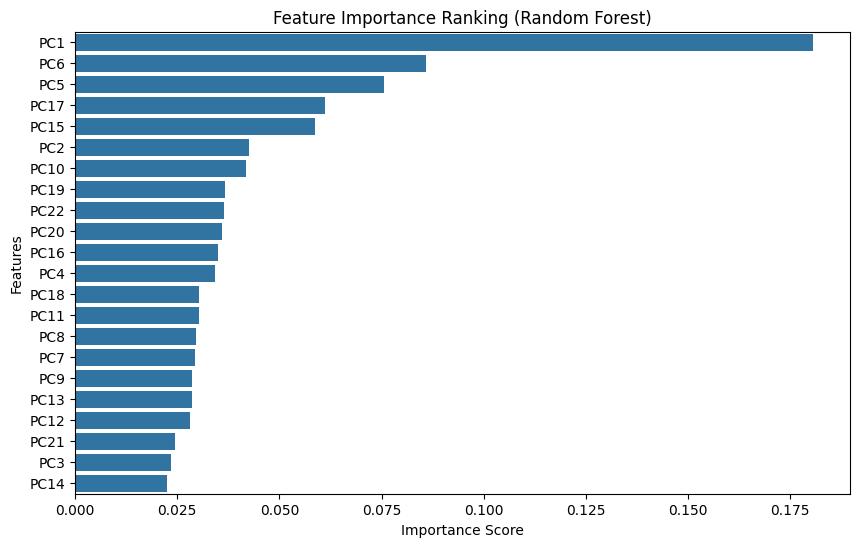

,PC17,PC6,PC1,PC16,PC5,PC11,PC15,PC9,PC10,target
0,-0.635008,0.133811,-1.275340,0.906177,0.807454,-0.261557,-0.638670,-0.280581,-0.538433,1
1,-0.050664,-0.790691,0.981921,-0.023809,1.101222,-0.436418,0.110892,-0.253904,0.192354,1
2,-0.096544,-0.764523,1.623430,0.016925,0.312562,0.027245,0.134509,0.175805,-0.121246,1
3,-0.099729,0.295277,1.351112,-0.064060,1.055129,-0.516024,0.082094,0.682209,0.051085,1
4,-0.016334,-0.133376,0.418956,0.220829,0.244601,0.619182,-0.338892,0.587373,0.642594,1


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Assume df is your dataframe and 'target' is the target column
X = df_pca.drop('target', axis=1)
y = df_pca['target']

# Feature Importance using Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance.values, y=feat_importance.index)
plt.title('Feature Importance Ranking (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Recursive Feature Elimination (RFE)
rfe = RFE(rf, n_features_to_select=5)
rfe.fit(X, y)
selected_rfe = X.columns[rfe.support_]

# Chi-Square Test (for categorical features)
X_chi2 = X.copy()
# Ensure all values are non-negative for chi2
X_chi2 = X_chi2.abs()
chi_scores, p_values = chi2(X_chi2, y)
chi2_results = pd.Series(chi_scores, index=X.columns).sort_values(ascending=False)

# Select most relevant features (intersection of top features)
top_rf = feat_importance.index[:5]
top_chi2 = chi2_results.index[:5]
selected_features = list(set(selected_rfe) | set(top_rf) | set(top_chi2))

# Reduced dataset
df_selected = df_pca[selected_features + ['target']]
df_selected.head()

In [4]:
%store df_selected

Stored 'df_selected' (DataFrame)
